In [1]:
import pandas as pd
import seaborn as sns

In [7]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [12]:
mpg['horsepower'].loc[32] = 75
mpg['horsepower'].loc[126] = 105
mpg['horsepower'].loc[330] = 51
mpg['horsepower'].loc[336] = 120
mpg['horsepower'].loc[354] = 73
mpg['horsepower'].loc[374] = 82

/tmp/ipykernel_1380302/3019380189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg['horsepower'].loc[32] = 75
/tmp/ipykernel_1380302/3019380189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg['horsepower'].loc[126] = 105
/tmp/ipykernel_1380302/3019380189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg['horsepower'].loc[330] = 51
/tmp/ipykernel_1380302/3019380189.py:4: SettingWithCopyWarning: 
A value is trying to

In [17]:
mpg.groupby('origin').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
origin,,,,,,,,
europe,70,70,70,70,70,70,70,70
japan,79,79,79,79,79,79,79,79
usa,249,249,249,249,249,249,249,249


In [20]:
dummies = pd.get_dummies(mpg['origin'])
dummies.loc[50:55]

,europe,japan,usa
50,True,False,False
51,True,False,False
52,True,False,False
53,False,True,False
54,False,True,False
55,True,False,False


In [22]:
mpg_data = pd.concat([mpg, dummies], axis=1)
mpg_data = mpg_data.drop(['origin', 'name'], axis=1)
mpg_data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
393,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720,19.4,82,False,False,True


In [78]:
mpg_data.columns[1:]

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'europe', 'japan', 'usa'],
      dtype='object')

In [96]:
mpg_queries = mpg_data[mpg_data.columns[1:]]
mpg_queries.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,8,307.0,130.0,3504,12.0,70,False,False,True
1,8,350.0,165.0,3693,11.5,70,False,False,True
2,8,318.0,150.0,3436,11.0,70,False,False,True
3,8,304.0,150.0,3433,12.0,70,False,False,True
4,8,302.0,140.0,3449,10.5,70,False,False,True


In [97]:
mpg_answers = mpg_data['mpg']
mpg_answers.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
queries_train, queries_test, answers_train, answers_test = \
train_test_split(mpg_queries, mpg_answers, test_size=0.25, random_state=42)
queries_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
245,4,98.0,66.0,1800,14.4,78,False,False,True
110,4,108.0,94.0,2379,16.5,73,False,True,False
16,6,199.0,97.0,2774,15.5,70,False,False,True
66,8,304.0,150.0,3672,11.5,72,False,False,True
153,6,250.0,105.0,3459,16.0,75,False,False,True


In [99]:
from sklearn.linear_model import LinearRegression
mpg_ai = LinearRegression().fit(queries_train, answers_train)
mpg_ai

LinearRegression()

In [100]:
mpg_predictions = mpg_ai.predict(queries_test)
mpg_predictions

array([32.65245159, 29.07756514, 21.13140225, 16.74004611, 12.38833141,
       26.81007539, 27.48949389,  9.82403965, 16.72864968, 21.4783931 ,
       12.79518842, 36.01282076, 24.40017034, 13.55660764, 23.51142324,
        6.42232238, 29.06313976, 24.80226392, 16.45051103, 36.07093269,
       24.79959465, 18.60941271, 28.53708642, 28.13946556, 14.92295199,
       35.73116844, 26.49364533, 24.5253894 , 21.78429651,  8.93709494,
       28.06550539, 36.07485627, 20.6145059 , 25.72712634, 34.045468  ,
       11.84948151, 22.42339243, 21.66058583, 12.26445851, 27.77894586,
       25.86984158, 28.42954025, 21.18004742,  6.95403785, 24.24763978,
       34.80491749, 27.94795152, 25.25621191, 23.4303838 , 28.64265438,
       22.11882613, 33.47980125, 32.49543039, 10.93713098, 27.3987175 ,
       10.08004891, 19.87717064, 29.75834956, 22.60310081, 20.26113172,
       16.06365533, 31.84815648, 23.52692218, 21.52336047, 20.58247739,
       25.18882101, 24.68911155, 31.91481925, 27.41872558, 12.66

In [101]:
mpg_ai_answers = pd.Series(data=mpg_predictions, name='mpg.ai')
mpg_ai_answers

0     32.652452
1     29.077565
2     21.131402
3     16.740046
4     12.388331
        ...    
95    32.282934
96    29.800755
97    23.334430
98    26.258647
99    12.625938
Name: mpg.ai, Length: 100, dtype: float64

In [102]:
mpg_comparison = pd.concat([answers_test.reset_index(), mpg_ai_answers], axis=1)
mpg_comparison['error'] = mpg_comparison['mpg'] - mpg_comparison['mpg.ai']
mpg_comparison 

,index,mpg,mpg.ai,error
0,198,33.0,32.652452,0.347548
1,396,28.0,29.077565,-1.077565
2,33,19.0,21.131402,-2.131402
3,208,13.0,16.740046,-3.740046
4,93,14.0,12.388331,1.611669
...,...,...,...,...
95,378,38.0,32.282934,5.717066
96,371,29.0,29.800755,-0.800755
97,280,21.5,23.334430,-1.834430
98,323,27.9,26.258647,1.641353


In [103]:
mpg_ai.score(mpg_queries, mpg_answers)

0.8237627303164654

In [104]:
corr = mpg_data.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
mpg,1.000000,-0.775396,-0.804203,-0.778828,-0.831741,0.420289,0.579267,0.259022,0.442174,-0.568192
cylinders,-0.775396,1.000000,0.950721,0.841860,0.896017,-0.505419,-0.348746,-0.352861,-0.396479,0.604351
displacement,-0.804203,0.950721,1.000000,0.896839,0.932824,-0.543684,-0.370164,-0.373886,-0.433505,0.651407
horsepower,-0.778828,0.841860,0.896839,1.000000,0.864779,-0.688949,-0.414998,-0.290916,-0.315889,0.489201
weight,-0.831741,0.896017,0.932824,0.864779,1.000000,-0.417457,-0.306564,-0.298843,-0.440817,0.598398
acceleration,0.420289,-0.505419,-0.543684,-0.688949,-0.417457,1.000000,0.288137,0.204473,0.109144,-0.250806
model_year,0.579267,-0.348746,-0.370164,-0.414998,-0.306564,0.288137,1.000000,-0.024489,0.193101,-0.139883
europe,0.259022,-0.352861,-0.373886,-0.290916,-0.298843,0.204473,-0.024489,1.000000,-0.229895,-0.597198
japan,0.442174,-0.396479,-0.433505,-0.315889,-0.440817,0.109144,0.193101,-0.229895,1.000000,-0.643317
usa,-0.568192,0.604351,0.651407,0.489201,0.598398,-0.250806,-0.139883,-0.597198,-0.643317,1.000000


<Axes: >

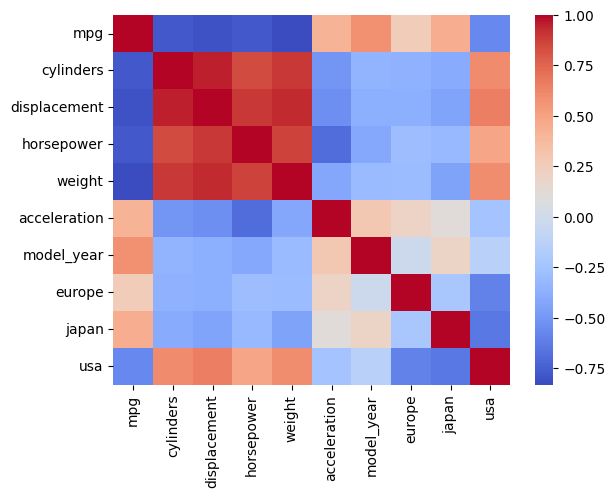

In [107]:
sns.heatmap(corr, cmap='coolwarm')